#  Heating, ventilation, and air conditioning (HAVC) Analysis

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

from fiona.crs import from_epsg



from IPython.display import Image

import urllib
#import mplleaflet as mpll
% pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Heating

In [5]:
#download data
#!wget https://data.cityofnewyork.us/api/views/it56-eyq4/rows.csv?accessType=DOWNLOAD

--2019-05-04 18:32:24--  https://data.cityofnewyork.us/api/views/it56-eyq4/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]  37.23M  5.07MB/s    in 7.5s    

2019-05-04 18:32:32 (4.98 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [39034107]



In [9]:
#!rename rows.csv?accessType=DOWNLOAD.csv Heating Gas Consumption And Cost.csv

Can't modify constant item in scalar assignment at (user-supplied code) line 3, at EOF
syntax error at (user-supplied code) line 3, at EOF


In [17]:
#!mv  rows.csv data/heatinggasconsumption.csv

In [3]:
heating = pd.read_csv('data/heatinggasconsumption.csv')

In [4]:
heating.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,"BETANCES II, 9A",BRONX,BETANCES II (BLD 4),BLD 04,Not Applicable,NaN,220.0,294,B022000,FEDERAL,...,06/30/2018,37,3.95416E+14,N,14.60,NaN,Exception,26.0,BROKERED GAS,ConEd
1,WOODSON,BROOKLYN,WOODSON,BLD 02,Not Applicable,NaN,182.0,285,K018200,FEDERAL,...,06/30/2018,36,548925110,N,5630.37,NaN,Yes,11831.0,BROKERED GAS,NatGrid NYC
2,GLEBE AVENUE-WESTCHESTER AVENUE,BRONX,GLEBE AVENUE-WESTCHESTER AVENUE,BLD 01,NONE,NaN,225.0,342,B022500,FEDERAL,...,06/30/2018,8,3434006,Y,362.56,Trans Gen Non-Res,Yes,623.0,UTILITY GAS,ConEd
3,BELMONT-SUTTER AREA,BROOKLYN,BELMONT-SUTTER AREA,BLD 01,AMR,NaN,345.0,761,K034500,FEDERAL,...,06/30/2018,36,5152819,Y,365.26,T3 TRAN MULT FAM,Yes,711.0,UTILITY GAS,NatGrid NYC
4,FENIMORE-LEFFERTS,BROOKLYN,FENIMORE-LEFFERTS,BLD 12,AMR,NaN,205.0,322,K020500,FEDERAL,...,06/30/2018,36,3907797,Y,59.71,T1B TRAN RES HEAT,Yes,33.0,UTILITY GAS,NatGrid NYC


In [ ]:
#dictionary 
Column Name	Description	Expected Values
Development Name	Development name	The name of the housing development as listed in the Development Data Book.
Borough	Borough	Bronx, Brooklyn, Manhattan, Queens, or Staten Island.
Account Name	name of all the development an account supplies	
Location	"Building number. 
In order to run an analysis by building, you can use a combination of TDS and building number which gives a unique identifier for each building"	The building number of the meter
Meter AMR	Is the meter Automatic Meter Reading (AMR), Interval or none	AMR, Interval, None
Meter Scope	The buildings or areas the account and meter supply	Listing of the buildings/Areas
TDS #	TDS (Tenant Data System) number is the unique identifier for all NCYHA developments. It is recommended to use it in order to run analysis by development. The TDS is also the unique link between NYCHA data sets.	"Number.
The non development facilities (as identified in the field Funding Source) don't have a TDS #. For these facilities use EDP or RC Code."
EDP	NYCHA Electronic Data Processing. Number used to identify individual NYCHA developments. EDP is used by NYCHA only to link data issued from a different system (the energy management system that was used by NYCHA before 2010). It is recommended to use the TDS # as a unique identifier of each development.	Three digit number
RC Code	"NYCHA budget responsibility code.  Code representing a specific development.
"	Letter indicating the borough and series of numbers.
Funding Source	"The development’s funding source including Federal,
Mixed Finance, or an indication that the facility is a non development facility which means a non residential facility."	Federal, Mixed Finance, or Non Development Facility
AMP number	Abbreviation for Asset Management Project (AMP) numbers.  HUD Development asset tracking number.  An AMP number can consist of more than one development.	NY and a series of numbers
Vendor Name	Utility vendor name	Vendor name
UMIS Bill ID	s utility management information system unique bill ID number.	
Revenue Month	Year and month of bill: 2016-01	2016-01
Service Start Date	Bill start date	Date
Service End Date	Bill end date	Date
number days	Number of days on bill	Number of days on bill
Meter Number	Meter number	Meter number
Estimated	Meter was not read for the time period. The consumption and cost are estimated. (Data is updated with actual reads once the meter is read)	Yes (Y)  or No (N)
Current Charges	Total costs	Dollar value
Rate Class	The rate applied to the account.  Details about each rate (dollar value) are available on the vendor web site.	Rate code is listed.
Bill Analyzed	The bill was analyzed for billing errors by NYCHA's Utility Management system during the billing period	Yes (Y)  or No (N)
Consumption (Therms)	Total therm consumption	Therm consumption
ES Commodity	NYCHA procures brokered gas from the Energy market and is still billed by the utility.  Each month an account will have brokered gas bill and a utility gas bill.  Consumption is listed on both bills, only use utility consumption values when analyzing the data	Brokered gas or Utility gas
Underlying Utility	Is the utility National Grid or Con edison	National Grid or Con edison


In [6]:
heating.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed',
       'Consumption (Therms)', 'ES Commodity', 'Underlying Utility'],
      dtype='object')

In [7]:
heating2 = heating[[ 'Borough',  'Location', 
     'Service Start Date',
       'Service End Date',  
       'Consumption (Therms)']]

In [8]:
heating2.head()

,Borough,Location,Service Start Date,Service End Date,Consumption (Therms)
0,BRONX,BLD 04,05/24/2018,06/30/2018,26.0
1,BROOKLYN,BLD 02,05/25/2018,06/30/2018,11831.0
2,BRONX,BLD 01,06/22/2018,06/30/2018,623.0
3,BROOKLYN,BLD 01,05/25/2018,06/30/2018,711.0
4,BROOKLYN,BLD 12,05/25/2018,06/30/2018,33.0


In [76]:
heating_bk = heating2[heating2['Borough']=='BROOKLYN']

In [77]:
heating_bk.dropna(subset=['Consumption (Therms)'],inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
heating_bk = heating_bk[heating_bk['Consumption (Therms)']>0]

In [79]:
heating_bk.describe()

,Consumption (Therms)
count,54541.000000
mean,17893.892323
std,42930.039095
min,1.000000
25%,650.000000
50%,1892.000000
75%,11085.000000
max,601102.470000


Text(0.5,1,'Total Heating therms consumption by year')

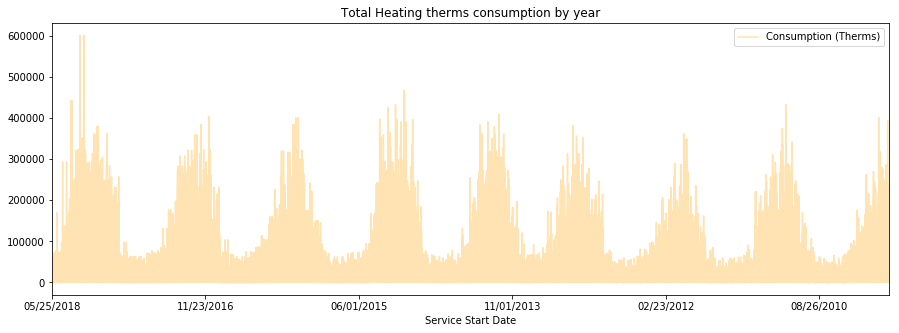

In [80]:
fig = plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
heating_bk.plot('Service Start Date','Consumption (Therms)',ax=ax,color='orange',alpha=0.3)
plt.title('Total Heating therms consumption by year')

In [81]:
heating_bk['Service Start Date'] = pd.to_datetime(heating_bk['Service Start Date'], format = "%m/%d/%Y", errors = 'coerce')

Text(0.5,1,'Heating consumption by year in Brooklyn')

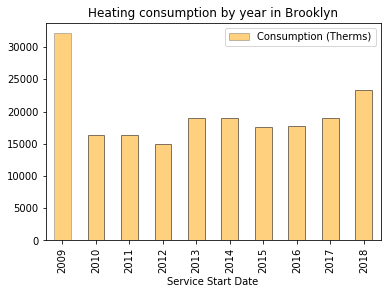

In [83]:
heating_bk.groupby(heating_bk['Service Start Date'].dt.year).mean()[['Consumption (Therms)']].plot(kind='bar',color='orange',edgecolor='grey',alpha=0.5)
plt.title('Heating consumption by year in Brooklyn')

### 2. Electric consumption

In [29]:
electric = pd.read_csv('https://data.cityofnewyork.us/api/views/jr24-e7cr/rows.csv?accessType=DOWNLOAD')

In [54]:
electric.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')


-Current Charges	Total costs	Dollar value
-Rate Class	The rate applied to the account.  Details about each rate (dollar value) are available on the vendor web site.	Rate code is listed.
-Bill Analyzed	The bill was analyzed for billing errors by NYCHA's Utility Management system during the billing period	Yes (Y)  or No (N)

-Consumption (KWH)	Total KWH consumption	KWH consumption

-KWH Charges	Total KWH charges	Dollar value

-Consumption (KW)	Total KW consumption	KW consumption

-KW Charges	Total KW charges	Dollar value

-Other charges	Total other charges	Dollar value

In [44]:
electric.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [48]:
electric_bk = electric[electric['Borough']=='BROOKLYN']

In [56]:
electric_bk.dtypes

Development Name       object
Borough                object
Account Name           object
Location               object
Meter AMR              object
Meter Scope            object
TDS #                 float64
EDP                   float64
RC Code                object
Funding Source         object
AMP #                  object
Vendor Name            object
UMIS BILL ID          float64
Revenue Month          object
Service Start Date     object
Service End Date       object
# days                float64
Meter Number           object
Estimated              object
Current Charges        object
Rate Class             object
Bill Analyzed          object
Consumption (KWH)     float64
KWH Charges            object
Consumption (KW)      float64
KW Charges             object
Other charges          object
dtype: object

In [57]:
electric_bk['Service Start Date'] = pd.to_datetime(electric_bk['Service Start Date'], format = "%m/%d/%Y", errors = 'coerce')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,1,'Electric consumption(kwh) per year in Brooklyn')

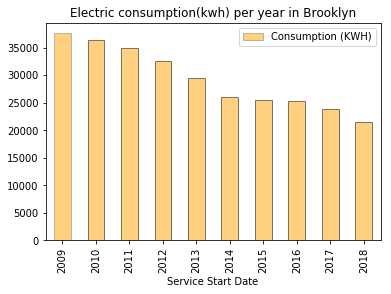

In [84]:
electric_bk.groupby(electric_bk['Service Start Date'].dt.year).mean()[['Consumption (KWH)']].plot(kind='bar',color='orange',edgecolor='grey',alpha=0.5)
plt.title('Electric consumption(kwh) per year in Brooklyn')